In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import seaborn as sns
%matplotlib inline

## Lecture 15 Covariance, Correlation and Regression

### Review of Lecture 14

- learn more properties on distribution functions, especially the Normal distribution
- learn how to understand your data(distributions) using histograms
- learn a new library for statistical data visualization, **seaborn**

### In this lecture we will:

- learn basic concepts of correlations, covariance, regression
- use Python to fit linear models for data sets
- use Python to fit non-linear models for data sets



### Bivariate statistics
Until now, we've worked with data that does not depend on other data. But there are many examples in the Earth Sciences where we are interested in the dependence between two types of data. For example, the distance from the ridge crest versus age gives you a spreading rate. The depth in a sediment core versus age gives you a sedimentation rate. The ratio of the radioactive form of carbon,  14
 C, to a stable form, 12
 C, is a function of the age of the material being dated. And we already saw that the difference in arrival times of the  P
  and  S
  seismic waves is related to distance from the source to the receiver. These examples rely on the use of bivariate statistics to get at the desired quantities.

### 1. What is correlation between datasets, Why is it useful?  

Correlation is one of the **most widely used** — and **widely misunderstood** — **statistical concepts**. In this lecture, we introduce the definitions and intuition behind correlation and illustrate how to calculate correlation using the Python libraries (Pandas). 

**Definition**: "correlation" refers to a mutual relationship or association between quantities. 

In almost any business models, it is useful to express one quantity in terms of its relationship with other quantities. For instance, sales might increase when the marketing department spends more on TV advertisements, or a customer's average purchase amount on an e-commerce website might depend on a number of factors related to that customer. Often, correlation is the first step to understanding these relationships and subsequently building better business and statistical models. 

So, why is correlation a useful metric?

- Correlation can help in predicting one quantity from another

- Correlation can (but often does not, as we will see in some examples below) indicate the presence of a causal relationship

- Correlation is used as a basic quantity and foundation for many other modeling techniques

Before we start to jump into the world of correlation, let's take a look at another important concept - **covariance**:

**Definition**: "covariance" in data science is basically a statistical measure of _association between two datasets X and Y_. First, each dataset is centered by subtracting its mean. These centered data points are multiplied together to measure whether the increase in one variable is associated with the increase in another. Finally, expected value (E) of the product of these centered scores is calculated as a summary of association. Mathematically, the covariance between two datasets _X_ and _Y_ are calculated as:

$$ Cov(X,Y) = E[(X-E(X))\cdot(Y-E(Y))]$$

Where $E(\cdot)$ is the "expectation" of the dataset (here you can regard it as the mean value of the data set). The mathematical definition looks less intuitive, but the physical meaning of covariance is quite straightforward (see the lecture notes). Basically, it means that, if both variables tend to move in the same direction, we expect $(X-E(X))$ and $(Y-E(Y))$ to have the same sign and increase together, corresponding to a larger **positive product** in the equation above. In a similar vein, if both variables tend to move in opposite directions, we expect $(X-E(X))$ and $(Y-E(Y))$ to have the opposite sign and but still increase together, corresponding to a larger **negative product** in the equation above. If the variables are unrelated, then the product should, on average, cancel out, corresponding to a product near 0 in the equation above. 

In a word, covariance defines how closely two data sets are associated with each other. 

**Recall**: If you still remember what "expected value" is, it is another way of saying the average, or mean $\mu$, of a dataset. It is also referred to as "expectation." 

In [2]:
# a couple of examples for positive, negative and zero covariance between two datasets

The problem with covariance is that it keeps the scale of the variables X and Y, and therefore can take on any value. This makes interpretation difficult and comparing covariances to each other impossible. For example, Cov(X, Y)  = 5.2 and Cov(Z, Q) = 3.1 tell us that these pairs are positively associated, but it is difficult to tell whether the relationship between X and Y is stronger than Z and Q without looking at the means and distributions of these variables. This is where correlation becomes useful — by standardizing covariance by some measure of variability in the data, it produces a quantity that has intuitive interpretations and consistent scale. 

### 2. Correlation coefficients between two data sets

_Pearson_ is the most widely used correlation coefficient. Pearson correlation measures the linear association between continuous variables. In other words, this coefficient quantifies the degree to which a relationship between two variables can be described by a line. Remarkably, while correlation can have many interpretations, the same formula developed by Karl Pearson over **120 years ago** is still the most widely used today.

In this section, we will introduce a formulation and intuitive interpretation for Pearson correlation correlation. 

The original formula for correlation, developed by Pearson himself, uses raw data and the means of two variables, $X$ and $Y$:

$$\rho_{X,Y} = \frac{\Sigma(X_i-\mu_X)(Y_i-\mu_Y)}{\sqrt{\Sigma(X_i-\mu_X)^2\Sigma(Y_i-\mu_Y)^2}}$$ 

In this formulation, raw observations are centered by subtracting their means and **re-scaled** by a measure of standard deviations. In other words, $\rho_{X,Y}$ is called "**Dimensionless**". Now we can compare between different data sets.

The figure below shows three examples of Pearson correlation. The closer ρ is to 1, the more an increase in one variable associates with an increase in the other. On the other hand, the closer ρ is to -1, the increase in one variable would result in decrease in the other. Note that if X and Y are independent, then ρ is close to 0, but not vice versa! In other words, Pearson correlation can be small even if there is a strong relationship between two variables. We will see shortly how this can be the case. 

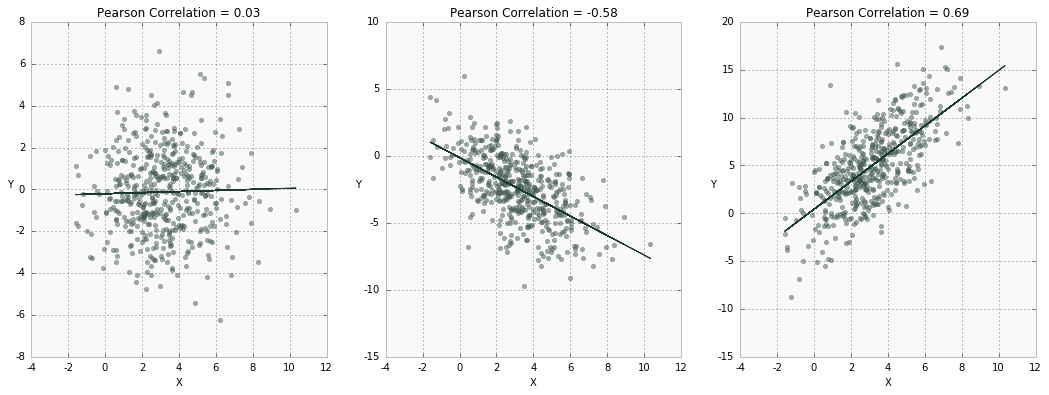

In [3]:
Image(filename='Figures/Statistics_correlation.png')

### 3. Calculating Correlation in Pandas

Recall the Hurrican Mangkhut data you've already processed:

   Year  Month  Day  Hour   Lat   Long  Pressure (hPa)  Wind (kt)  Class
0  2018      9    6    12  11.8  170.2            1008          0      2
1  2018      9    6    18  12.0  169.2            1008          0      2
2  2018      9    7     0  12.0  167.8            1008          0      2
3  2018      9    7     6  12.3  166.6            1006          0      2
4  2018      9    7    12  12.7  165.4            1000         35      3


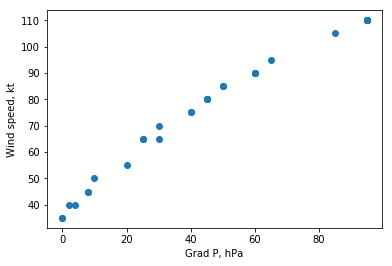

The correlation coefficient between "Wind Speed" and "gradP" is 0.98919618097888


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "datasets/mangkhut.xlsx" # file name and location
mg = pd.read_excel(file) # load file into pandas data frame

print(mg.head()) # print the head()

mg.rename(columns={'Pressure (hPa)':'Pres', 'Wind (kt)':'Wind'},inplace = True) # rename column names

mg = mg[mg.Wind>0] # filtering all the zero wind speeds

mg['gradP'] = mg['Pres'].max() - mg['Pres'] # create a new column which is the pressure gradient

plt.scatter(mg.gradP, mg.Wind) # make a plot showing the relationship between gradP and Wind
plt.xlabel('Grad P, hPa')
plt.ylabel('Wind speed, kt')
plt.show()

c1 = mg['Wind'].corr(mg['gradP'])
print('The correlation coefficient between "Wind Speed" and "gradP" is', c1)

In [8]:
mg.corr()

,Year,Month,Day,Hour,Lat,Long,Pres,Wind,Class,gradP
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,NaN,NaN,1.000000,-0.139432,0.828020,-0.992509,-0.369698,0.388957,0.396614,0.369698
Hour,NaN,NaN,-0.139432,1.000000,-0.040382,0.043045,-0.012507,-0.006051,-0.025402,0.012507
Lat,NaN,NaN,0.828020,-0.040382,1.000000,-0.814642,0.174553,-0.143231,0.056052,-0.174553
Long,NaN,NaN,-0.992509,0.043045,-0.814642,1.000000,0.403475,-0.425452,-0.436836,-0.403475
Pres,NaN,NaN,-0.369698,-0.012507,0.174553,0.403475,1.000000,-0.989196,-0.718066,-1.000000
Wind,NaN,NaN,0.388957,-0.006051,-0.143231,-0.425452,-0.989196,1.000000,0.802666,0.989196
Class,NaN,NaN,0.396614,-0.025402,0.056052,-0.436836,-0.718066,0.802666,1.000000,0.718066
gradP,NaN,NaN,0.369698,0.012507,-0.174553,-0.403475,-1.000000,0.989196,0.718066,1.000000


Let's drop the 'Year','Month','Day',and 'Hour' columns since correlation coefficent means nothing to these variables.

In [10]:
mg.drop(['Year', 'Month', 'Day', 'Hour'], axis=1).corr()

,Lat,Long,Pres,Wind,Class,gradP
Lat,1.000000,-0.814642,0.174553,-0.143231,0.056052,-0.174553
Long,-0.814642,1.000000,0.403475,-0.425452,-0.436836,-0.403475
Pres,0.174553,0.403475,1.000000,-0.989196,-0.718066,-1.000000
Wind,-0.143231,-0.425452,-0.989196,1.000000,0.802666,0.989196
Class,0.056052,-0.436836,-0.718066,0.802666,1.000000,0.718066
gradP,-0.174553,-0.403475,-1.000000,0.989196,0.718066,1.000000


In [11]:
mg.drop(['Year', 'Month', 'Day', 'Hour'], axis=1).describe()

,Lat,Long,Pres,Wind,Class,gradP
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,16.033333,135.987179,944.051282,83.589744,4.641026,55.948718
std,2.885840,16.434434,34.987929,25.827075,0.742938,34.987929
min,12.700000,108.300000,905.000000,35.000000,3.000000,0.000000
25%,14.100000,123.200000,905.000000,65.000000,5.000000,27.500000
50%,14.600000,135.200000,950.000000,85.000000,5.000000,50.000000
75%,17.700000,148.300000,972.500000,110.000000,5.000000,95.000000
max,23.200000,165.400000,1000.000000,110.000000,5.000000,95.000000


### Regressions (Curve Fitting)

- Basics about regression and curve fitting 
    - a
    - b

- How to do it in Python - **scipy**

scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, /*/*kwargs)

a complete documentation is here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Let's see an simple example of how the curve_fit function works

#### Linear model

First let's generate some linear data using the random module

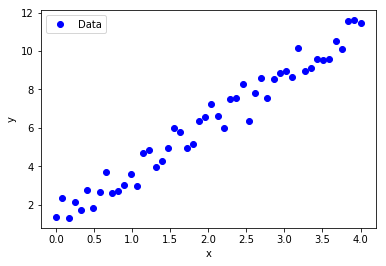

In [20]:
from scipy.optimize import curve_fit # import function curve_fit

# define a linear function
def func(x, a, b):
    return a *x + b

xdata = np.linspace(0, 4, 50) # x-axis
y = func(xdata, 2.5, 1.3) # data is func(x)
y_noise = 0.5 * np.random.normal(size=xdata.size) # generate some noise at each data point
ydata = y + y_noise # add the noise to the ydata
plt.plot(xdata, ydata, 'bo', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Now let's use the curve_fit function from scipy to calculate a line model use the least square error method

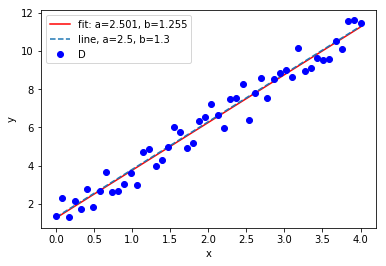

popt =  [2.50122391 1.25467496]
-------------------------------
pcov=
[[ 0.00464825 -0.0092965 ]
 [-0.0092965   0.02504364]]
-------------------------------
According to the fitting results:
a = 2.5012239055196464 +/- 0.06817809186401011
b = 1.2546749626362343 +/- 0.15825183931755307


In [40]:
popt, pcov = curve_fit(func, xdata, ydata) # curve fitting, popt has the a,b,c calculated by SciPy

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt)) # Plot the results
plt.plot(xdata, y, '--', label='line, a=2.5, b=1.3') # plot the theoretical line
plt.plot(xdata, ydata, 'bo', label='D') # plot the original data

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


print('popt = ',popt)
print('-------------------------------')
print('pcov=')
print(pcov)
print('-------------------------------')
print('According to the fitting results:')
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)

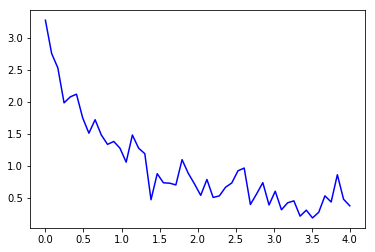

In [22]:
# first let's define an exponential function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50) # x-axis
y = func(xdata, 2.5, 1.3, 0.5) # data is func(x)

y_noise = 0.2 * np.random.normal(size=xdata.size) # generate some noise at each data point
ydata = y + y_noise # add the noise to the ydata

plt.plot(xdata, ydata, 'b-', label='data')

Now let's see if we can recover the original func(x) using curve fitting method

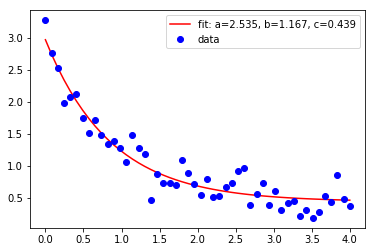

In [25]:
popt, pcov = curve_fit(func, xdata, ydata) # curve fitting, popt has the a,b,c calculated by SciPy

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) # Plot the results

plt.plot(xdata, ydata, 'bo', label='data') # now plot the dat set

plt.legend()

Now let's take a look at a real example, the pressure gradient and wind speed in Typhoons

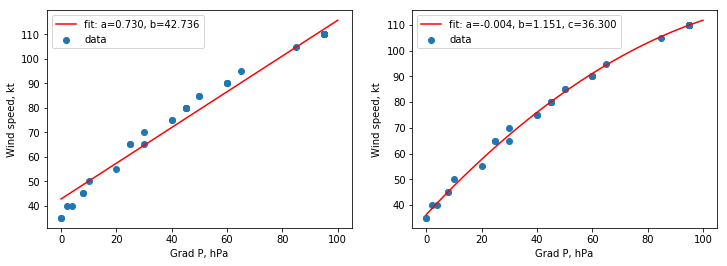

In [13]:
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "datasets/mangkhut.xlsx" # file name and location
mg = pd.read_excel(file) # load file into pandas data frame

mg.rename(columns={'Pressure (hPa)':'Pres', 'Wind (kt)':'Wind'},inplace = True) # rename column names

mg = mg[mg.Wind>0] # filtering all the zero wind speeds

mg['gradP'] = mg['Pres'].max() - mg['Pres'] # create a new column which is the pressure gradient

def func_linear(x, a, b):
    return a * x + b

plt.figure(figsize=(12,4))
# linear fit
popt, pcov = curve_fit(func_linear, mg['gradP'], mg['Wind'])

plt.subplot(1,2,1)
plt.scatter(mg.gradP, mg.Wind,label='data') # make a plot showing the relationship between gradP and Wind
plt.xlabel('Grad P, hPa')
plt.ylabel('Wind speed, kt')

x=np.linspace(0,100,50)

plt.plot(x, func_linear(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()

# quadratic fit
def func_quadratic(x, a, b, c):
    return a * x**2 + b*x + c

popt, pcov = curve_fit(func_quadratic, mg['gradP'], mg['Wind'])

plt.subplot(1,2,2)
plt.scatter(mg.gradP, mg.Wind,label='data') # make a plot showing the relationship between gradP and Wind
plt.xlabel('Grad P, hPa')
plt.ylabel('Wind speed, kt')

plt.plot(x, func_quadratic(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()